In [1]:
import numpy as np
from sklearn.decomposition import NMF
from scipy.stats.stats import pearsonr
%matplotlib inline
import sys
sys.path.append('..')
from cnmf import load_df_from_npz, get_highvar_genes #error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bhtsne import tsne #error
import palettable #error
import matplotlib.gridspec as gridspec

In [2]:
#/Users/Rachel/Library/Mobile Documents/com~apple~CloudDocs/R-090321
import scipy

def read_mtx(filename, dtype: str = "float32"):
    """\
    Read `.mtx` file.
    Parameters
    ----------
    filename
        The filename.
    dtype
        Numpy data type.
    """
    from scipy.io import mmread
    X = mmread(filename).astype(dtype)
    from scipy.sparse import csr_matrix
    X = csr_matrix(X)
    return X



In [3]:
#data_dir=!/Users/Rachel/Library/Mobile Documents/com~apple~CloudDocs/R-090321
import pandas as pd
Xobs = read_mtx('/Users/RachelJackson/Library/Mobile Documents/com~apple~CloudDocs/R-090321'+'/'+'LoGiudice_counts_file_lane1_4')
gene_metadata = pd.read_csv('/Users/RachelJackson/Library/Mobile Documents/com~apple~CloudDocs/R-090321'+'/'+'LoGiudice_gene_metadata_file_lane1_4', sep=',')
cell_metadata = pd.read_csv('/Users/RachelJackson/Library/Mobile Documents/com~apple~CloudDocs/R-090321'+'/'+'LoGiudice_cell_metadata_file_lane1_4', sep=',')
mouseTFs=pd.read_csv('/Users/RachelJackson/Library/Mobile Documents/com~apple~CloudDocs/R-090321'+'/'+'Mus_musculus_TF.txt', sep='\t')

In [4]:
mouseTFs.head()

,Species,Symbol,Ensembl,Family,Protein,Entrez ID
0,Mus_musculus,Zfp146,ENSMUSG00000037029,zf-C2H2,ENSMUSP00000058588;,26465
1,Mus_musculus,Ets1,ENSMUSG00000032035,ETS,ENSMUSP00000051303;ENSMUSP00000139107;ENSMUSP0...,23871
2,Mus_musculus,Mxd3,ENSMUSG00000021485,bHLH,ENSMUSP00000021941;,17121
3,Mus_musculus,Rhox6,ENSMUSG00000097200,Homeobox,ENSMUSP00000138055;,-
4,Mus_musculus,Zfp82,ENSMUSG00000098022,zf-C2H2,ENSMUSP00000079647;ENSMUSP00000138217;,330502


In [5]:
sizefactors = cell_metadata['sizeFactor'].values     # puts sizefactors into a numpy array
bool_genes_select = gene_metadata['HVG_sqrt'].values  # creates a boolean vector marking genes as HV or not
X_hvgenes = Xobs[bool_genes_select,:].T                 # keeps only HV genes and takes transpose
X_hvgenes = (X_hvgenes.T / sizefactors).T           # perform normalization on counts
TPM_hvgs= pd.DataFrame(X_hvgenes)

In [6]:
bool_genes_select2 = gene_metadata['HVG_sqrt'].values  # creates a boolean vector marking genes as HV or not
X_hvgenes = Xobs[bool_genes_select2,:].T                 # keeps only HV genes and takes transpose
X_hvgenes = (X_hvgenes.T / sizefactors).T           # perform normalization on counts
TPM_hvgs2= pd.DataFrame(X_hvgenes)

In [7]:
genesnonTF=gene_metadata['genes'][gene_metadata['HVG_sqrt']]
genesTF=genesnonTF[genesnonTF.isin(mouseTFs['Symbol'].values.tolist())]

In [8]:
cell_metadata.head()

,Unnamed: 0,lane,barcode,sum,detected,percent_top_50,percent_top_100,percent_top_200,percent_top_500,subsets_Mito_sum,...,cc_G2M_score,cc_S_score,cc_Phase,Photoreceptor_Precursors,Neurogenic,Amacrine_cells,Late_Progenitor,Early_Progenitor,RGC,other
0,AAACCTGAGATGTCGG,Lane1,AAACCTGAGATGTCGG,3222,1414,26.784606,39.137182,52.389820,71.632526,112,...,0.109,0.234,G1,8.481315e-03,2.809163e-02,1.627095e-06,5.139025e-04,9.309512e-01,2.147972e-03,2.981234e-02
1,AAACCTGCAATCCAAC,Lane1,AAACCTGCAATCCAAC,2551,1281,24.186593,35.711486,49.235594,69.384555,97,...,0.111,0.005,G1,2.087432e-02,1.393036e-02,1.029493e-07,2.942941e-04,8.899110e-01,6.541481e-03,6.844849e-02
2,AAACCTGGTTCCTCCA,Lane1,AAACCTGGTTCCTCCA,10358,2996,32.554547,41.320718,51.255069,65.794555,287,...,0.007,0.396,G1,1.653679e-11,4.201438e-12,5.958423e-19,1.004168e-13,1.238913e-14,1.000000e+00,1.955208e-10
3,AAACCTGTCCAATGGT,Lane1,AAACCTGTCCAATGGT,2736,1410,26.461988,36.074561,48.062865,66.739766,95,...,0.000,0.411,G1,6.730015e-02,2.379681e-01,6.772000e-03,9.341630e-04,7.809395e-03,4.533106e-01,2.259056e-01
4,AAACGGGAGGCAATTA,Lane1,AAACGGGAGGCAATTA,9226,2755,25.579883,37.762844,50.205940,65.716454,225,...,1.000,0.009,G2M,1.910176e-19,8.872248e-19,3.917819e-31,9.624606e-21,1.000000e+00,6.326453e-22,2.869543e-18


In [9]:
gene_metadata.head()

,Unnamed: 0,genes,ensembl_gene_id,gene_type,binomial_deviance,HVG_log,HVG_sqrt,HVG_FT,HVG_dev,HVG_log3000,HVG_sqrt3000,HVG_FT3000,HVG_dev3000
0,Tuba1a,Tuba1a,ENSMUSG00000072235,protein_coding,91321.851360,True,False,False,True,True,False,False,True
1,Tmsb10,Tmsb10,ENSMUSG00000079523,protein_coding,72796.454935,True,True,True,True,True,True,True,True
2,Actb,Actb,ENSMUSG00000029580,protein_coding,53117.722873,True,True,True,True,True,True,True,True
3,Tubb3,Tubb3,ENSMUSG00000062380,protein_coding,50424.043613,True,True,True,True,True,True,True,True
4,Gap43,Gap43,ENSMUSG00000047261,protein_coding,50302.552757,True,True,True,True,True,True,True,True


Run t-SNE:

In [10]:
## And run PCA
PCs = PCA(n_components=10, random_state=0).fit_transform(preprocessing.scale(TPM_hvgs))
PCs = pd.DataFrame(PCs, index=TPM_hvgs.index, columns=['PC%d' % i for i in range(1,11)])
PCs.head()

## And run tSNE
tsnedat = pd.DataFrame(tsne(PCs.values, rand_seed=123), index=PCs.index, columns=['TSNE1', 'TSNE2'])

Run NMF on sqrt transformed data for 7 components:

In [11]:
sqrt_TPM_hvgs=np.sqrt(TPM_hvgs)
#sqrt_TPM_hvgs = sqrt_TPM_hvgs/ sqrt_TPM_hvgs.std(axis=0)  #this line scales the data  
model = NMF(n_components=7, init='random', random_state=0, beta_loss='kullback-leibler', solver='mu')
W = model.fit_transform(sqrt_TPM_hvgs)
H = model.components_

Plot t-SNE coloured by cell weights:

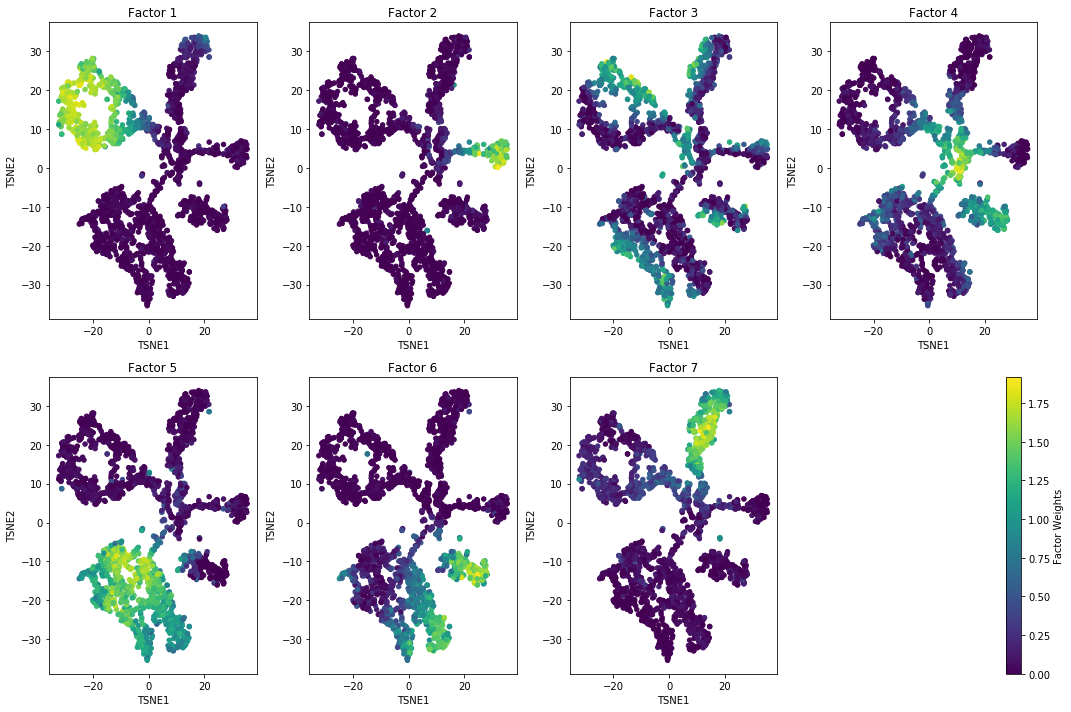

In [12]:
fig, axs = plt.subplots(2,4,figsize=(15,10))
axs=axs.ravel()
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
for i in range(7):
    sc=axs[i].scatter(x,  y, c=W[:,i], s=20)
    axs[i].set_xlabel("TSNE1")
    axs[i].set_ylabel("TSNE2")
    axs[i].set_title("Factor "+str(i+1))
plt.colorbar(sc, label="Factor Weights")
axs[7].axis('off')
plt.tight_layout()
plt.show()

Plot Correlation heatmap (Pearson correlations between cell factors and components of the metadata)"

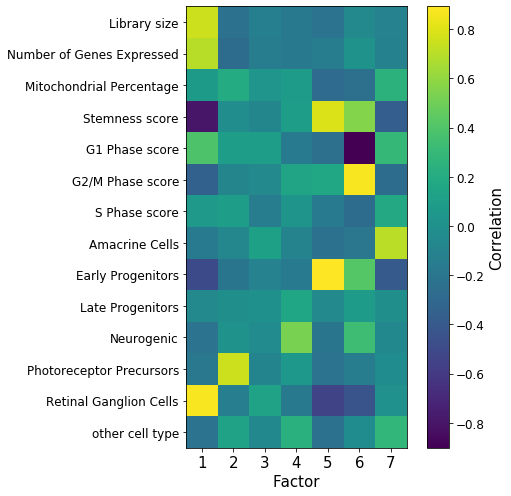

In [13]:
factors=7
x=factors
metadata=14
correlation=np.zeros((metadata,factors))
for i in range(factors):
    correlation[0,i]=pearsonr(W[:,i],cell_metadata['sum'])[0]
    correlation[1,i]=pearsonr(W[:,i],cell_metadata['detected'])[0]
    correlation[2,i]=pearsonr(W[:,i],cell_metadata['subsets_Mito_percent.1'])[0]
    correlation[3,i]=pearsonr(W[:,i],1-cell_metadata['CytoTRACE_results'])[0]
    correlation[4,i]=pearsonr(W[:,i],cell_metadata['cc_G1_score'])[0]
    correlation[5,i]=pearsonr(W[:,i],cell_metadata['cc_G2M_score'])[0]
    correlation[6,i]=pearsonr(W[:,i],cell_metadata['cc_S_score'])[0]
    correlation[7,i]=pearsonr(W[:,i],cell_metadata['Amacrine_cells'])[0]
    correlation[8,i]=pearsonr(W[:,i],cell_metadata['Early_Progenitor'])[0]
    correlation[9,i]=pearsonr(W[:,i],cell_metadata['Late_Progenitor'])[0]
    correlation[10,i]=pearsonr(W[:,i],cell_metadata['Neurogenic'])[0]
    correlation[11,i]=pearsonr(W[:,i],cell_metadata['Photoreceptor_Precursors'])[0]
    correlation[12,i]=pearsonr(W[:,i],cell_metadata['RGC'])[0]
    correlation[13,i]=pearsonr(W[:,i],cell_metadata['other'])[0]
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator, FixedLocator)
## set up ticks for plots
wgt_labels = [str(i+1) for i in range(x)] # list of weight labels
wgt_tick_positions = range(x)
plt.figure(figsize=(7,7))
## plot heatmap ##
plt.imshow(correlation,interpolation='nearest')
cb=plt.colorbar()
cb.ax.tick_params(labelsize=12)
cb.ax.set_ylabel('Correlation',fontsize=15)
ax = plt.gca()
## set ticks and labels for weights ##
ax.set_xticks(wgt_tick_positions)
ax.set_xticklabels(wgt_labels,fontsize=15)
ax.set_xlabel("Factor", fontsize=15)
labels=['Library size','Number of Genes Expressed', 'Mitochondrial Percentage', 'Stemness score', 'G1 Phase score', 'G2/M Phase score', 'S Phase score', 'Amacrine Cells', 'Early Progenitors', 
        'Late Progenitors', 'Neurogenic', 'Photoreceptor Precursors', 'Retinal Ganglion Cells', 'other cell type']
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels,fontsize=12,ha='right')
plt.grid(True, which='minor', linewidth=2,color='White')
plt.tight_layout()
plt.show()

Identifying top genes in each factor:

In [14]:
top_genes_idx0 = np.argsort(H[0,:])[::-1]
top_genes0 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx0]
top_TFs = [ gene for gene in list(top_genes0) if gene in genesTF.tolist()]

In [15]:
top_genes_idx1 = np.argsort(H[1,:])[::-1]
top_genes1 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx1]
top_TFs1 = [ gene for gene in list(top_genes1) if gene in genesTF.tolist()]

In [16]:
top_genes_idx2 = np.argsort(H[2,:])[::-1]
top_genes2 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx2]
top_TFs2 = [ gene for gene in list(top_genes2) if gene in genesTF.tolist()]

In [17]:
top_genes_idx3 = np.argsort(H[3,:])[::-1]
top_genes3 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx3]
top_TFs3 = [ gene for gene in list(top_genes3) if gene in genesTF.tolist()]

In [18]:
top_genes_idx4 = np.argsort(H[4,:])[::-1]
top_genes4 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx4]
top_TFs4 = [ gene for gene in list(top_genes4) if gene in genesTF.tolist()]

In [19]:
top_genes_idx5 = np.argsort(H[5,:])[::-1]
top_genes5 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx5]
top_TFs5 = [ gene for gene in list(top_genes5) if gene in genesTF.tolist()]

In [20]:
top_genes_idx6 = np.argsort(H[6,:])[::-1]
top_genes6 = np.array(gene_metadata['genes'][gene_metadata['HVG_sqrt']])[top_genes_idx6]
top_TFs6 = [ gene for gene in list(top_genes6) if gene in genesTF.tolist()]

In [21]:
from astropy.table import QTable, Table, Column
arr1 = {'Factor 1': top_TFs,
        'Factor 2': top_TFs1,
        'Factor 3': top_TFs2,
        'Factor 4': top_TFs3,
        'Factor 5': top_TFs4,
        'Factor 6': top_TFs5,
        'Factor 7': top_TFs6}
#Tablesqrt=Table(arr1)
Table(arr1).show_in_notebook()

idx,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
0,Ebf1,Neurod1,Sox11,Hmgb1,Hmgb1,Hmgb2,Sox11
1,Isl1,Neurod4,Myef2,Rorb,Fos,Hmgb1,Pax6
2,Klf7,Otx2,Rorb,Sox11,Hes1,Mis18bp1,Rorb
3,Sox11,Meis2,Hmgb1,Cnbp,Rorb,Rorb,Sox4
4,Pou6f2,Thrb,Hsf2,Hmgb2,Zfp36l1,Hmgb3,Hmgb1
5,Hmgb1,Hmgb1,Gatad1,Hmgb3,Hmgb2,Pax6,Tsc22d1
6,Tsc22d1,Rorb,Zfp207,Neurod1,Id3,Ssrp1,Onecut2
7,Pou4f1,Crx,Klf13,Carhsp1,Cnbp,Cnbp,Carhsp1
8,Pax6,Cnbp,Khsrp,Rbpj,Id2,Sox11,Hmgb3
9,Tcf25,Onecut2,Ybx1,Zfp422,Pax6,Id2,Cnbp


Plot of expression of specific genes in HVG selection:

In [22]:
geneselection='Id1'
HVG_geneloc=np.where(gene_metadata['genes'][gene_metadata['HVG_sqrt']]==geneselection)[0][0]
geneloc=np.where(gene_metadata['genes']==geneselection)[0][0]

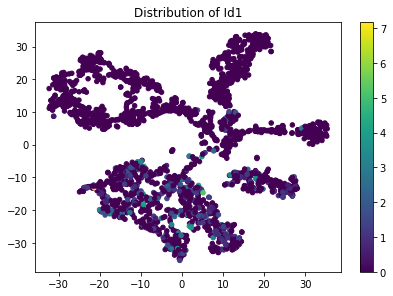

In [23]:
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
sc=plt.scatter(x,  y, c=np.array(TPM_hvgs)[:,HVG_geneloc], s=20)
#want to find index in TPM_hvgs which corresponds to a specific gene name 
plt.colorbar(sc)
plt.tight_layout()
plt.title("Distribution of "+str(gene_metadata['genes'][geneloc]))
plt.show()

Stemness score plot:

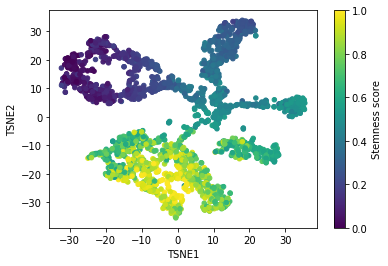

In [24]:

x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
sc=plt.scatter(x,  y, c=1-cell_metadata["CytoTRACE_results"], s=20)
plt.colorbar(sc, label="Stemness score")
plt.show()

CytoTRACE plot:

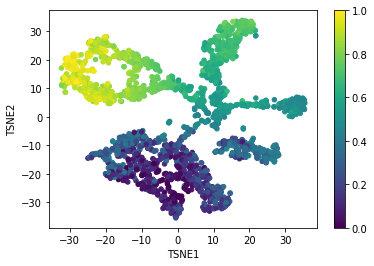

In [25]:

x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
sc=plt.scatter(x,  y, c=cell_metadata["CytoTRACE_results"], s=20)
plt.colorbar(sc)
plt.show()

t-SNE plot coloured by QC metrics:

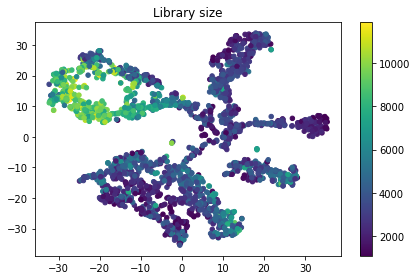

In [26]:
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
sc=plt.scatter(x,  y, c=cell_metadata['sum'], s=20)
plt.colorbar(sc)
plt.title("Library size")
plt.tight_layout()
plt.show()

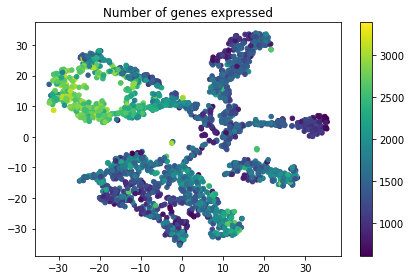

In [27]:
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
sc=plt.scatter(x,  y, c=cell_metadata['detected'], s=20)
plt.colorbar(sc)
plt.title("Number of genes expressed")
plt.tight_layout()
plt.show()

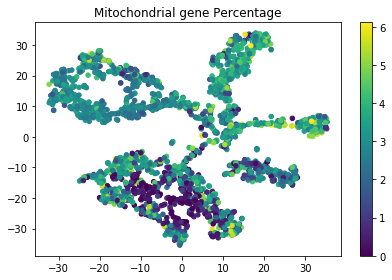

In [28]:
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
sc=plt.scatter(x,  y, c=cell_metadata['subsets_Mito_percent.1'], s=20)
plt.colorbar(sc)
plt.title("Mitochondrial gene Percentage")
plt.tight_layout()
plt.show()

G1 score plot:

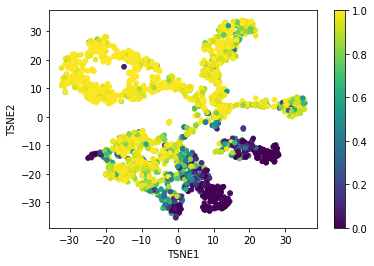

In [29]:

x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
sc=plt.scatter(x,  y, c=cell_metadata["cc_G1_score"], s=20)
plt.colorbar(sc)
#plt.tight_layout()
plt.show()

Cell cycle phase plot:

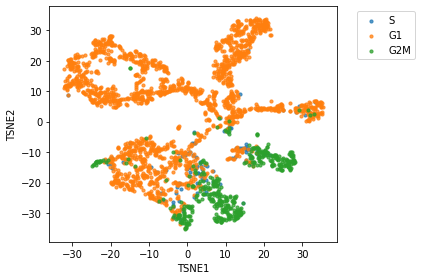

In [30]:
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
labels=cell_metadata['cc_Phase'].values
for k, g in enumerate(set(labels)):
    idx = [i for i, j in enumerate(labels) if j == g]
    plt.scatter(x[idx],y[idx],s=10, label=g,alpha=0.75)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Cell Assign t-SNE plot:

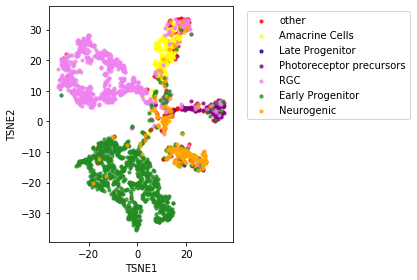

In [31]:
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
colours=['red','yellow','darkblue','purple','violet','forestgreen','orange']
labels=cell_metadata['cell_type'].values
for k, g in enumerate(set(labels)):
    idx = [i for i, j in enumerate(labels) if j == g]
    plt.scatter(x[idx],y[idx],s=10, label=g, c=colours[k],alpha=0.75)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Run NMF on FT transformed data for 9 components:

In [32]:
stabilize_TPM_hvgs=np.sqrt(TPM_hvgs2)+np.sqrt(TPM_hvgs2+1)
stabilize_TPM_hvgs = stabilize_TPM_hvgs/ stabilize_TPM_hvgs.std(axis=0) #scaling
model = NMF(n_components=9, init='random', random_state=0, beta_loss='kullback-leibler', solver='mu')
W = model.fit_transform(stabilize_TPM_hvgs)
H = model.components_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


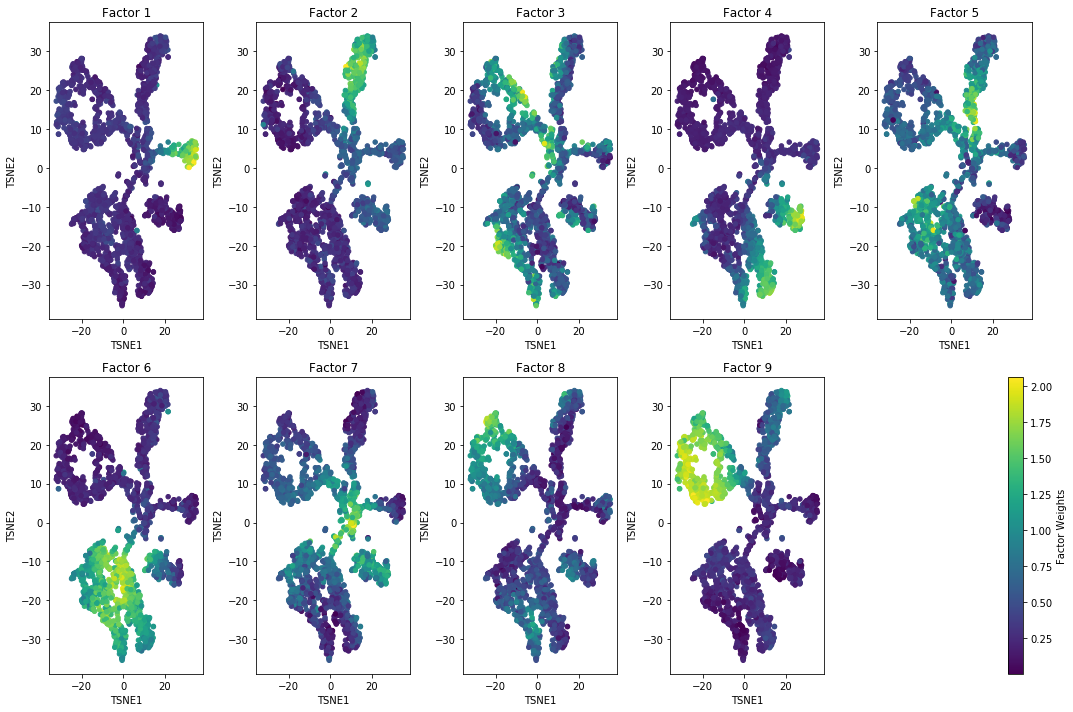

In [33]:
fig, axs = plt.subplots(2,5,figsize=(15,10))
axs=axs.ravel()
x = tsnedat['TSNE1']
y = tsnedat['TSNE2']
for i in range(9):
    sc=axs[i].scatter(x,  y, c=W[:,i], s=20)
    axs[i].set_xlabel("TSNE1")
    axs[i].set_ylabel("TSNE2")
    axs[i].set_title("Factor "+str(i+1))
plt.colorbar(sc, label="Factor Weights")
axs[9].axis('off')
plt.tight_layout()
plt.show()

Identifying top genes for each factor:

In [34]:
top_genes_idx = np.argsort(H[0,:])[::-1]
top_genes = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx]
top_TFs_ = [ gene for gene in list(top_genes) if gene in genesTF.tolist()]

In [35]:
top_genes_idx1 = np.argsort(H[1,:])[::-1]
top_genes1 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx1]
top_TFs_1 = [ gene for gene in list(top_genes1) if gene in genesTF.tolist()]

In [36]:
top_genes_idx2 = np.argsort(H[2,:])[::-1]
top_genes2 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx2]
top_TFs_2 = [ gene for gene in list(top_genes2) if gene in genesTF.tolist()]

In [37]:
top_genes_idx3 = np.argsort(H[3,:])[::-1]
top_genes3 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx3]
top_TFs_3 = [ gene for gene in list(top_genes3) if gene in genesTF.tolist()]

In [38]:
top_genes_idx4 = np.argsort(H[4,:])[::-1]
top_genes4 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx4]
top_TFs_4 = [ gene for gene in list(top_genes4) if gene in genesTF.tolist()]

In [39]:
top_genes_idx5 = np.argsort(H[5,:])[::-1]
top_genes5 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx5]
top_TFs_5 = [ gene for gene in list(top_genes5) if gene in genesTF.tolist()]

In [40]:
top_genes_idx6 = np.argsort(H[6,:])[::-1]
top_genes6 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx6]
top_TFs_6 = [ gene for gene in list(top_genes6) if gene in genesTF.tolist()]

In [41]:
top_genes_idx7 = np.argsort(H[7,:])[::-1]
top_genes7 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx7]
top_TFs_7 = [ gene for gene in list(top_genes7) if gene in genesTF.tolist()]

In [42]:
top_genes_idx8 = np.argsort(H[8,:])[::-1]
top_genes8 = np.array(gene_metadata['genes'][gene_metadata['HVG_FT']])[top_genes_idx8]
top_TFs_8 = [ gene for gene in list(top_genes8) if gene in genesTF.tolist()]

In [43]:
arr2 = {'Factor 1': top_TFs_,
        'Factor 2': top_TFs_1,
        'Factor 3': top_TFs_2,
        'Factor 4': top_TFs_3,
        'Factor 5': top_TFs_4,
        'Factor 6': top_TFs_5,
        'Factor 7': top_TFs_6,
        'Factor 8': top_TFs_7,
        'Factor 9': top_TFs_8,}
#TableFT=Table(arr2)
Table(arr2).show_in_notebook()

idx,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9
0,St18,Pias1,Ebf3,Tsc22d1,Id3,Id3,Egr1,Id2,Klf7
1,Lcorl,Rorb,Id2,Pax6,Sox4,Sox4,Zfp36l1,Hmgxb4,Pou6f2
2,Crx,Zeb1,Hmga1,Hmgb2,Zic5,Hes1,Hmgb1,Ikzf5,Onecut2
3,Rxrg,Sox11,Neurod4,Zfp260,Zeb2,Zfhx3,Id3,Hmga1,Ebf1
4,Khsrp,Atf4,Gpbp1l1,Tcf25,Tmf1,Tcf4,Dach1,Gpbp1l1,Isl1
5,Nr2f2,Zic5,Zfhx4,Mysm1,Zeb1,Fos,Zfp207,Crx,Zfp36l1
6,Kmt2c,Ssrp1,Sox4,Klf7,Six3,Hbp1,Sox4,Zfhx4,Pou4f1
7,Neurod1,Khsrp,Id3,Hmgb1,Crx,Cnbp,Zfp266,Ebf3,Zbtb20
8,Neurog2,Tsc22d3,Sox11,Meis2,Neurog2,Gatad1,Ikzf5,Tfap2d,Ybx1
9,Tmf1,Crx,St18,St18,Dlx1,Plagl1,Meis2,Pias1,Mis18bp1


Correlation heatmap (Pearson correlation of cell factor weights vs metadata):

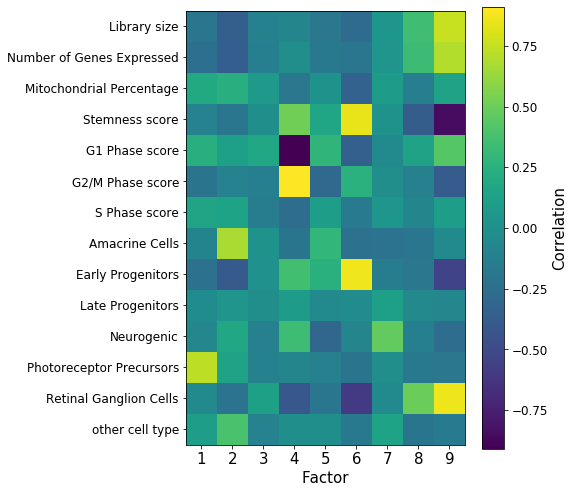

In [44]:
factors=9
x=factors
metadata=14
correlation=np.zeros((metadata,factors))
for i in range(factors):
    correlation[0,i]=pearsonr(W[:,i],cell_metadata['sum'])[0]
    correlation[1,i]=pearsonr(W[:,i],cell_metadata['detected'])[0]
    correlation[2,i]=pearsonr(W[:,i],cell_metadata['subsets_Mito_percent.1'])[0]
    correlation[3,i]=pearsonr(W[:,i],1-cell_metadata['CytoTRACE_results'])[0]
    correlation[4,i]=pearsonr(W[:,i],cell_metadata['cc_G1_score'])[0]
    correlation[5,i]=pearsonr(W[:,i],cell_metadata['cc_G2M_score'])[0]
    correlation[6,i]=pearsonr(W[:,i],cell_metadata['cc_S_score'])[0]
    correlation[7,i]=pearsonr(W[:,i],cell_metadata['Amacrine_cells'])[0]
    correlation[8,i]=pearsonr(W[:,i],cell_metadata['Early_Progenitor'])[0]
    correlation[9,i]=pearsonr(W[:,i],cell_metadata['Late_Progenitor'])[0]
    correlation[10,i]=pearsonr(W[:,i],cell_metadata['Neurogenic'])[0]
    correlation[11,i]=pearsonr(W[:,i],cell_metadata['Photoreceptor_Precursors'])[0]
    correlation[12,i]=pearsonr(W[:,i],cell_metadata['RGC'])[0]
    correlation[13,i]=pearsonr(W[:,i],cell_metadata['other'])[0]
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator, FixedLocator)
## set up ticks for plots
wgt_labels = [str(i+1) for i in range(x)] # list of weight labels
wgt_tick_positions = range(x)
plt.figure(figsize=(7,7))
## plot heatmap ##
plt.imshow(correlation,interpolation='nearest')
cb=plt.colorbar()
cb.ax.tick_params(labelsize=12)
cb.ax.set_ylabel('Correlation',fontsize=15) 
ax = plt.gca()
## set ticks and labels for weights ##
ax.set_xticks(wgt_tick_positions)
ax.set_xticklabels(wgt_labels,fontsize=15)
ax.set_xlabel("Factor", fontsize=15)
labels=['Library size','Number of Genes Expressed', 'Mitochondrial Percentage', 'Stemness score', 'G1 Phase score', 'G2/M Phase score', 'S Phase score', 'Amacrine Cells', 'Early Progenitors', 
        'Late Progenitors', 'Neurogenic', 'Photoreceptor Precursors', 'Retinal Ganglion Cells', 'other cell type']
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels,fontsize=12,ha='right')
plt.grid(True, which='minor', linewidth=2,color='White')
plt.tight_layout()
plt.show()